<center><font size="6">Panchal_Apoorva_HW1</font></center>
<center><font size="6">USC ID : 8685016290</font></center>
<br>
<center><font size="5">Vertebral Column Data</font></center>

All the referred links have been listed in the respective cells  
Data is downloaded each time the notebook is run hence the files are found in notebook folder

### (a) Download Data

Package imports

In [1]:
from urllib.request import urlretrieve
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn import metrics
import numpy as np
import math

Get the Vertebral Column Data Set

In [2]:
# https://realpython.com/python-download-file-from-url/

url = 'https://archive.ics.uci.edu/static/public/212/vertebral+column.zip'
filename = 'vertebral_column.zip'
urlretrieve(url, filename)

('vertebral_column.zip', <http.client.HTTPMessage at 0x14a0cf990>)

In [3]:
# https://stackoverflow.com/questions/19371860/python-open-file-in-zip-without-temporarily-extracting-it

zip = zipfile.ZipFile('vertebral_column.zip', 'r').extractall()
cols = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'ab_no']
cols_val = ['Pelvic Incidence', 'Pelvic Tilt', 'Lumbar Lordosis Angle', 'Sacral Slope', 'Pelvic Radius', 'Degree Spondylolisthesis']
df = pd.read_csv('./column_2C.dat', names = cols, delimiter=' ')
df['ab_no'] = df['ab_no'].replace('AB',1)
df['ab_no'] = df['ab_no'].replace('NO', 0)
print(df.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic_radius  degree_spondylolisthesis  ab_no  
0          98.67                     -0.25      1  
1         114.41                      4.56      1  
2         105.99                     -3.53      1  
3         101.87                     11.21      1  
4         108.17                      7.92      1  


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

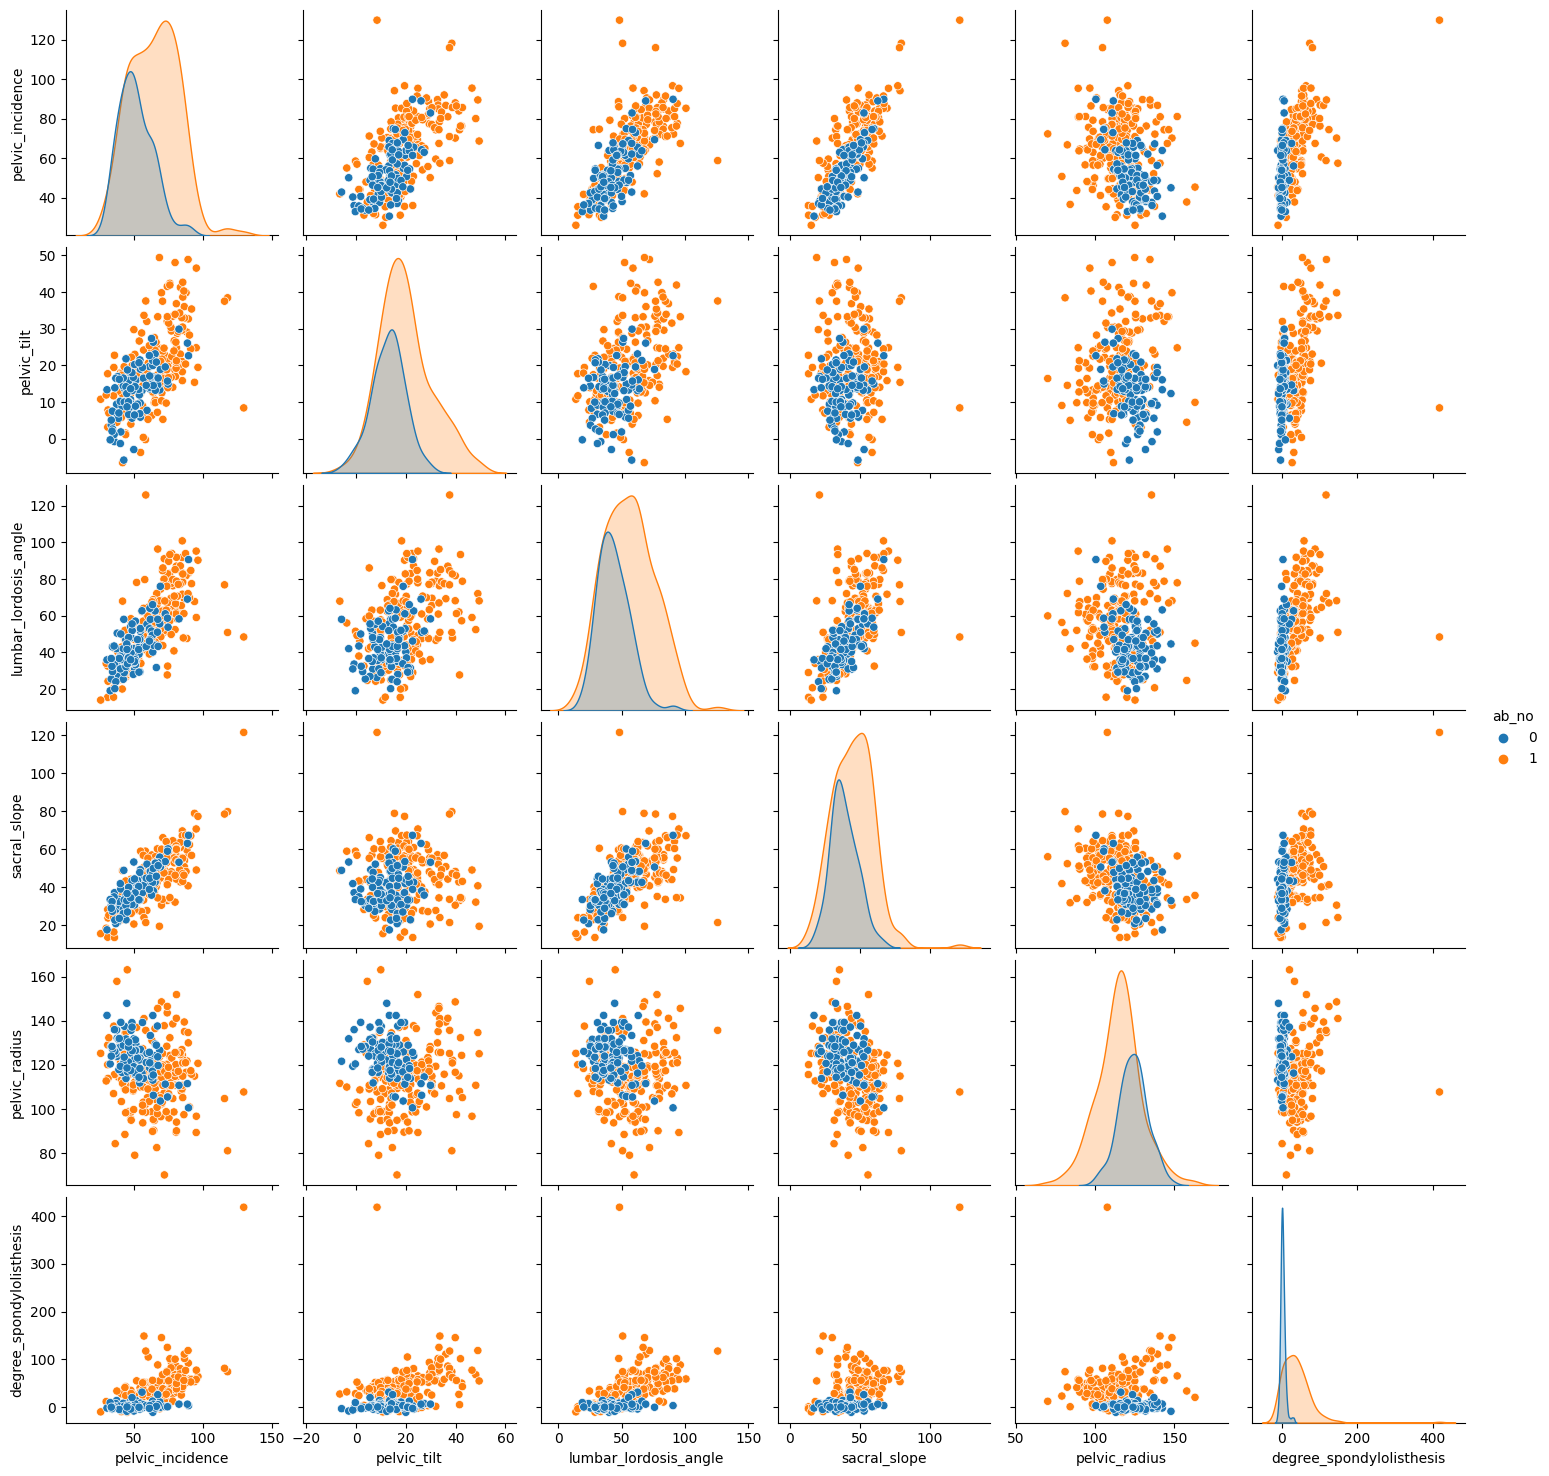

In [4]:
sns.pairplot(data=df,hue="ab_no")
plt.show()

#### ii. Boxplots

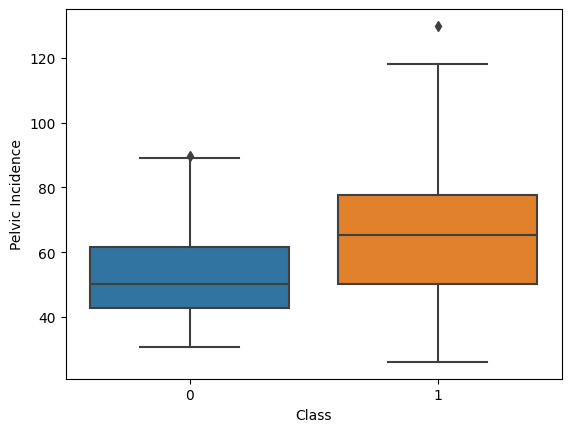

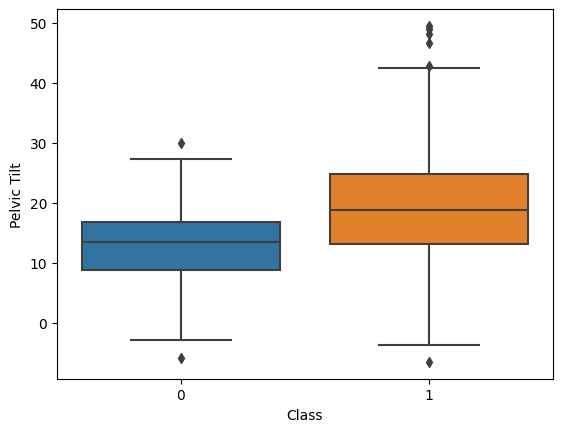

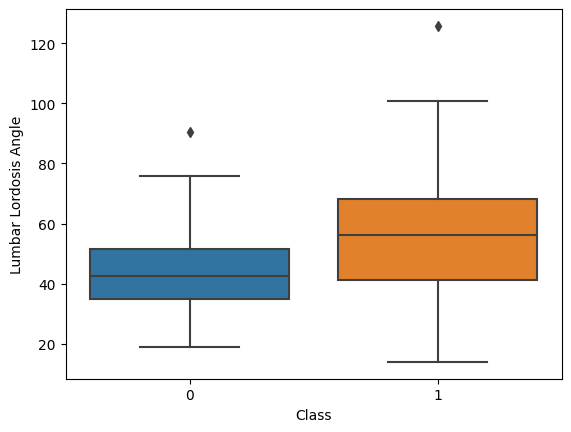

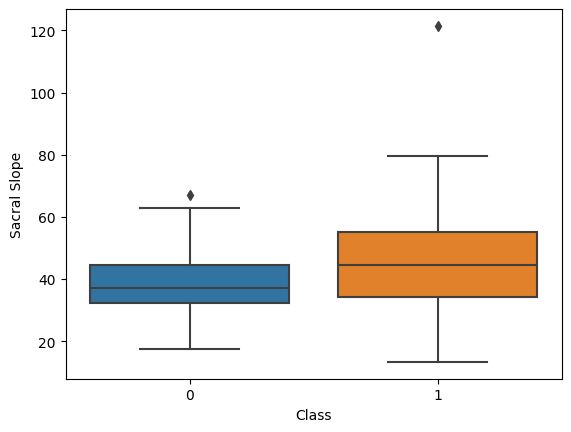

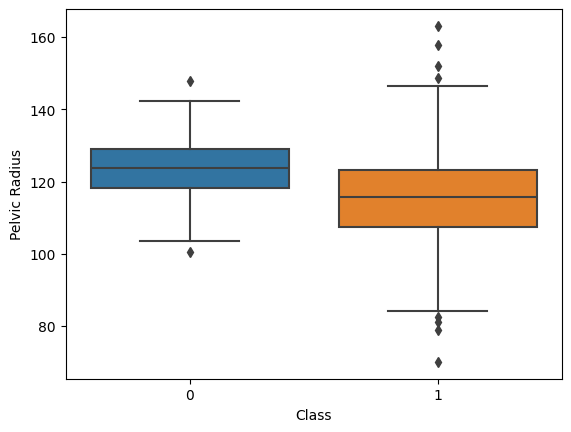

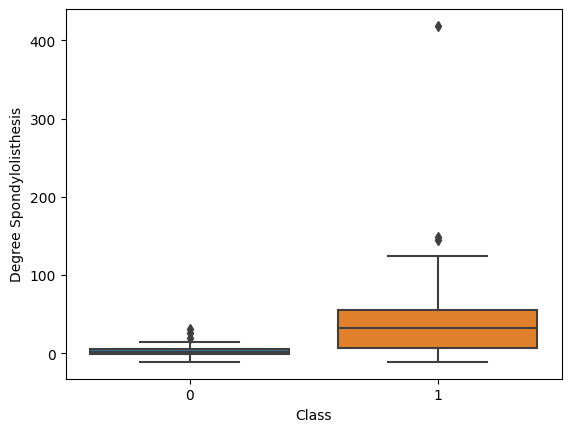

In [5]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
for i in range(0, len(cols)-1):
    sns.boxplot(data=df, x="ab_no", y=cols[i]).set(
    xlabel='Class', 
    ylabel=cols_val[i]
    )
    plt.show()

#### iii. Split Data Set

In [6]:
class_no = df[df["ab_no"]==0]
class_ab = df[df["ab_no"]==1]

train_set = pd.concat([class_no.head(70), class_ab.head(140)])
x_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:,-1]

test_set = df.drop(train_set.index)

x_test = test_set.iloc[:, :-1]
y_test = test_set.iloc[:,-1]

### (c) Classification

#### i. Euclidean Metric and ii. knn

In [7]:
# https://www.analyticsvidhya.com/blog/2021/04/simple-understanding-and-implementation-of-knn-algorithm/
# https://fda.readthedocs.io/en/latest/auto_examples/plot_k_neighbors_classification.html
train_error = []
test_error = []
best_k = 0
best_score = 0
k_vals = []
best_k_pred = []
for i in range(208, 0, -1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(np.mean(y_train!= y_pred_train))
    test_error.append(np.mean(y_test!= y_pred_test))
    k_vals.append(i)
    score = knn.score(x_test, y_test)
    if(score>best_score):
        best_k = i
        best_score = score
        best_k_pred = y_pred_test

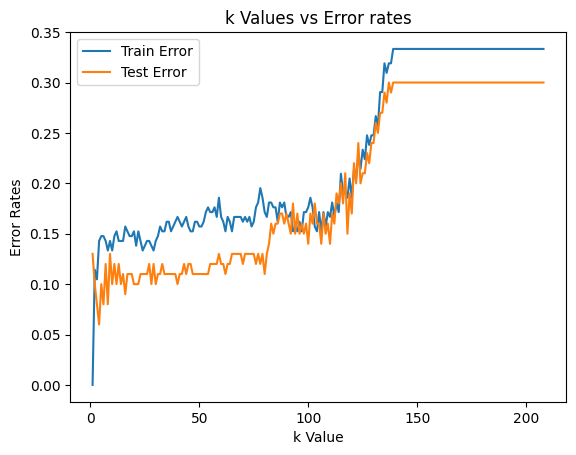

In [8]:
plt.plot(k_vals,train_error, label='Train Error')
plt.plot(k_vals, test_error, label='Test Error')
plt.xlabel('k Value')
plt.ylabel('Error Rates')
plt.title('k Values vs Error rates')
plt.legend()
plt.show()

In [9]:
print('Optimal k : ', best_k)
print('Best Score : ',best_score)

Optimal k :  4
Best Score :  0.94


Optimal k : 4  
Best Score : 0.94

In [10]:
cm = metrics.confusion_matrix(y_test, best_k_pred)
print(metrics.classification_report(y_test, best_k_pred))
print('Confusion Matrix : \n', cm)
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]
tpr = tp/(tp+fn)
tnr = tn/(fp+tn)
print('\nTrue Positive Rate ', tpr)
print('True Negative Rate ', tnr)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

Confusion Matrix : 
 [[25  5]
 [ 1 69]]

True Positive Rate  0.9857142857142858
True Negative Rate  0.8333333333333334


#### iii. Learning Curve

In [11]:
best_error_rates = []
best_k_train_sizes = []
train_sizes = []
for i in range(10,210, 10):
    best_error = 1
    best_k_temp = 0
    temp_train = pd.concat([class_no.head(math.floor(i/3)), class_ab.head(i-(math.floor(i/3)))])
    temp_train_x = temp_train.iloc[:, :-1]
    temp_train_y = temp_train.iloc[:,-1]
    for k in range(1, i, 5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(temp_train_x, temp_train_y)
        y_pred_test = knn.predict(x_test)
        temp_test_error = np.mean(y_test!= y_pred_test)
        if(temp_test_error<best_error):
            best_k_temp = k
            best_error = temp_test_error
    best_error_rates.append(best_error)
    best_k_train_sizes.append(best_k_temp)
    train_sizes.append(i)


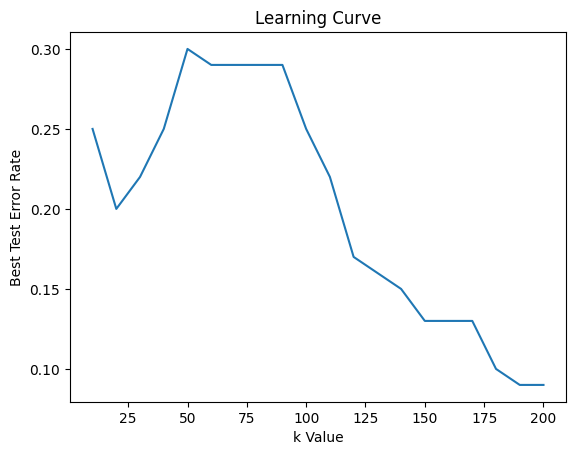

In [12]:
plt.plot(train_sizes,best_error_rates)
plt.xlabel('k Value')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [13]:
best_k_manhattan = 0
best_error_manhattan = 1

for i in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p = 1)
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    temp_te = np.mean(y_test!= y_pred_test)
    if(temp_te<=best_error_manhattan):
        best_k_manhattan = i 
        best_error_manhattan = temp_te

print('Optimal k (manhattan) : ', best_k_manhattan)
print('Best Test Error (Manhattan) : ', best_error_manhattan)

Optimal k (manhattan) :  26
Best Test Error (Manhattan) :  0.11


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [14]:
best_p_log = 0
best_error_log = 1
i_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in i_range:
    knn = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='minkowski', p = 10**i)
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    temp_te = np.mean(y_test!= y_pred_test)
    if(temp_te<=best_error_log):
        best_p_log = i 
        best_error_log = temp_te

print('Optimal log10(p) (Manhattan with log) : ', best_p_log)
print('Best Test Error (Manhattan with log) : ', best_error_log)

Optimal log10(p) (Manhattan with log) :  0.6
Best Test Error (Manhattan with log) :  0.1


##### C. Chebyshev Distance With p -> infinity.

In [15]:
best_k_chebyshev = 0
best_error_chebyshev = 1

for i in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p = float('inf'))
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    temp_te = np.mean(y_test!= y_pred_test)
    if(temp_te<=best_error_chebyshev):
        best_k_chebyshev = i 
        best_error_chebyshev = temp_te

print('Optimal k (Chebyshev) : ', best_k_chebyshev)
print('Best Test Error (Chebyshev) : ', best_error_chebyshev)

Optimal k (Chebyshev) :  16
Best Test Error (Chebyshev) :  0.08


#### ii. Mahalanobis Distance.

In [16]:
# https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics/34650347#34650347
best_k_mahalanobis = 0
best_error_mahalanobis = 1
x_inv = np.linalg.inv(np.cov(x_train.T))
for i in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=i, metric='mahalanobis', metric_params={'VI': x_inv})
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    temp_te = np.mean(y_test!= y_pred_test)
    if(temp_te<=best_error_mahalanobis):
        best_k_mahalanobis = i 
        best_error_mahalanobis = temp_te

print('Optimal k (Mahalanobis) : ', best_k_mahalanobis)
print('Best Test Error (Mahalanobis) : ', best_error_mahalanobis)

Optimal k (Mahalanobis) :  6
Best Test Error (Mahalanobis) :  0.17


In [17]:
# https://www.educba.com/python-print-table/

d = {
'Optimal k/log10(p)': [best_k_manhattan, best_p_log, best_k_chebyshev, best_k_mahalanobis],
'Best Test Error': [best_error_manhattan, best_error_log, best_error_chebyshev, best_error_mahalanobis]
}
print ("{:<20} {:<10} {:<22} {:<10} {:<10}".format(' ','Manhattan','Manhattan with log(p)','Chebyshev','Mahalanobis'))
for k, v in d.items():
    lang, perc, change, x = v
    print ("{:<20} {:<10} {:<22} {:<10} {:<10}".format(k, lang, perc, change, x))

                     Manhattan  Manhattan with log(p)  Chebyshev  Mahalanobis
Optimal k/log10(p)   26         0.6                    16         6         
Best Test Error      0.11       0.1                    0.08       0.17      


### (e) Weighted Decision

In [18]:
bk_man_wt = 0
berror_man_wt = 1

bk_euc_wt = 0
berror_euc_wt = 1

bk_cheb_wt = 0
berror_cheb_wt = 1

for i in range(1, 197, 5):
    knn_euc = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski', p = 2)
    knn_man = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski', p = 1)
    knn_cheb = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski', p = float('inf'))
    
    knn_euc.fit(x_train, y_train)
    knn_man.fit(x_train, y_train)
    knn_cheb.fit(x_train, y_train)

    ypt_euc = knn_euc.predict(x_test)
    ypt_man = knn_man.predict(x_test)
    ypt_cheb = knn_cheb.predict(x_test)

    te_euc = np.mean(y_test!= ypt_euc)
    te_man = np.mean(y_test!= ypt_man)
    te_cheb = np.mean(y_test!= ypt_cheb)

    if(te_euc<=berror_euc_wt):
        bk_euc_wt = i 
        berror_euc_wt = te_euc

    if(te_man<=berror_man_wt):
        bk_man_wt = i 
        berror_man_wt = te_man

    if(te_cheb<=berror_cheb_wt):
        bk_cheb_wt = i 
        berror_cheb_wt = te_cheb

print('Optimal k (Euclidean Wt) : ', bk_euc_wt)
print('Best Test Error (Euclidean Wt) : ', berror_euc_wt)

print('Optimal k (Manhattan Wt) : ', bk_man_wt)
print('Best Test Error (Manhattan Wt) : ', berror_man_wt)

print('Optimal k (Chebyshev Wt) : ', bk_cheb_wt)
print('Best Test Error (Chebyshev Wt) : ', berror_cheb_wt)


Optimal k (Euclidean Wt) :  6
Best Test Error (Euclidean Wt) :  0.1
Optimal k (Manhattan Wt) :  26
Best Test Error (Manhattan Wt) :  0.1
Optimal k (Chebyshev Wt) :  61
Best Test Error (Chebyshev Wt) :  0.11


### (f) Training Error Rate

The lowest training error is encountered when the k=1 using the Euclidean metric. The error rate = 0
The reason is because it only looks at itself and in turns creates a lookup table, thus the training error becomes 0.